In [1]:
import pandas as pd
from pandas.core.frame import DataFrame
import os
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import inflect
from tqdm import tqdm
os.environ["CUDA_LAUNCH_BLOCKING"]="1"

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
train_df = pd.read_csv(os.getcwd() + "/" + "nlp-lab-dm23/train_processed.csv")
test_df = pd.read_csv(os.getcwd() + "/" + "nlp-lab-dm23/test.csv")

In [27]:
test_df

,ID,Title,Description
0,0,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,1,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,2,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,3,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
...,...,...,...
7595,7595,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,7596,Void is filled with Clement,With the supply of attractive pitching options...
7597,7597,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,7598,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...


In [31]:
train_df = train_df.sample(frac=1).reset_index(drop=True)

In [32]:
q = inflect.engine()

def lowercase_text(text):
  return text.lower()

def remove_nums(text):
  return re.sub(r'\d+', '', text)

def replace_nums(text):
  # split strings into list of texts
  temp_string = text.split()
  # initialise empty list
  new_str = []

  for word in temp_string:
      # if text is a digit, convert the digit
      # to numbers and append into the new_str list
      if word.isdigit():
          temp = q.number_to_words(word)
          new_str.append(temp)
      # append the texts as it is
      else:
          new_str.append(word)

  # join the texts of new_str to form a string
  temp_str = ' '.join(new_str)
  return temp_str

def remove_punct(text):
  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)

def remove_stopwords(text):
  stop_words = set(stopwords.words("english"))
  word_tokens = word_tokenize(text)
  filtered_text = [word for word in word_tokens if word not in stop_words]
  return filtered_text

def full_preprocessing_pipeline(df: DataFrame):
  res = []
  for i, row in tqdm(df.iterrows()):
    res.append(
      remove_stopwords(
        remove_punct(
          remove_nums(
            lowercase_text(
                row[2]
            )
          )
        )
      )
    )
  return res

In [33]:
preprocessed_train = full_preprocessing_pipeline(train_df)

120000it [00:45, 2625.90it/s]


In [34]:
preprocessed_train[0]

['hard',
 'overstate',
 'sense',
 'shock',
 'across',
 'much',
 'europe',
 'popular',
 'mandate',
 'americans',
 'given',
 'george',
 'w',
 'bush',
 'even',
 'result',
 'great',
 'surprise']

In [35]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

lemmatizer = WordNetLemmatizer()

def lemmatize_words(texts):
  stemmed_text = []
  for text in tqdm(texts):
    stemmed_text.append([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in text])
  return stemmed_text
texts_lem = lemmatize_words(preprocessed_train)

100%|██████████| 120000/120000 [15:25<00:00, 129.68it/s]


In [36]:
def preprocess_sample(text):
    t = remove_stopwords(
        remove_punct(
          remove_nums(
            lowercase_text(
                text
            )
          )
        )
      )
    return " ".join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in t])

train_df["Description"] = train_df["Description"].apply(lambda x: preprocess_sample(x))

In [43]:
train_df

,Unnamed: 0,Class Index,Title,Description
0,0,1,We Have To Talk,hard overstate sense shock across much europe ...
1,1,2,"Boss, Pedro talk shop",sometimes george steinbrenner negotiate tuesda...
2,2,2,Crawford leads way as US goes 1-2-3 in 200m,finish partisan greek crowd want see shawn cra...
3,3,2,Ajax Amsterdam 0-1 Juventus: FT Report,amsterdam september champion league moment bri...
4,4,3,Krispy Kreme SEC probe widens,krispy kreme doughnut inc say friday inform se...
...,...,...,...,...
119995,119995,2,A bit of a head-scratcher,many professional league recently defend champ...
119996,119996,2,Fans Learning to Make Do Without NHL (AP),ap nhl disappear right eye reason simple
119997,119997,2,Can Arroyo help Red Sox finally get a win?,curt schilling pedro martinez bring boston red...
119998,119998,2,Woods May Stay No. 1 - for Now (AP),ap stewart cink atop leaderboard david tom lea...


In [92]:
train_df.to_csv("train_processed.csv")

In [4]:
train_labels = train_df["Class Index"]

In [3]:
import numpy as np
import pandas as pd
import time
import datetime
import gc
import random
from nltk.corpus import stopwords
import re

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler,random_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import transformers
from transformers import BertForSequenceClassification, AdamW, BertConfig,BertTokenizer,get_linear_schedule_with_warmup, BertModel

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # "cuda:0" if torch.cuda.is_available() else 
device

device(type='cuda', index=0)

In [47]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [48]:
texts = train_df.Description.values

In [49]:
print(' Original: ', texts[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(texts[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(texts[0])))

 Original:  hard overstate sense shock across much europe popular mandate american give george w bush even result great surprise
Tokenized:  ['hard', 'overs', '##tate', 'sense', 'shock', 'across', 'much', 'europe', 'popular', 'mandate', 'american', 'give', 'george', 'w', 'bush', 'even', 'result', 'great', 'surprise']
Token IDs:  [2524, 15849, 12259, 3168, 5213, 2408, 2172, 2885, 2759, 11405, 2137, 2507, 2577, 1059, 5747, 2130, 2765, 2307, 4474]


In [50]:
max_len = 0

# For every sentence...
for sent in texts:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  211


In [81]:
input_ids = []
attention_masks = []

# For every tweet...
for text in texts:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        text,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = max_len,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0).to(device)
attention_masks = torch.cat(attention_masks, dim=0).to(device)
labels = torch.tensor(train_labels)
#labels.apply_(lambda x: x-1).to(device)

# Print sentence 0, now as a list of IDs.
print('Original: ', texts[0])
print('Token IDs:', input_ids[0])

/home/user/conda/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  hard overstate sense shock across much europe popular mandate american give george w bush even result great surprise
Token IDs: tensor([  101,  2524, 15849, 12259,  3168,  5213,  2408,  2172,  2885,  2759,
        11405,  2137,  2507,  2577,  1059,  5747,  2130,  2765,  2307,  4474,
          102,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
   

In [82]:
type(train_labels)

pandas.core.series.Series

In [83]:
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.8 * len(dataset))
#val_size = int(0.2 * len(dataset))
val_size = len(dataset)  - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

96,000 training samples
24,000 validation samples


In [84]:
# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [85]:
model = BertModel.from_pretrained('bert-base-uncased')

### MLP

In [86]:
import torch
import torch.nn as nn

class BertTextClassifier(nn.Module):
    def __init__(self, bert_model, num_classes):
        super(BertTextClassifier, self).__init__()
        self.bert = bert_model
        self.dropout = nn.Dropout(0.1)
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_classes)
        self.activ = nn.Softmax(dim=0)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        # print(outputs)
        pooled_output = outputs.last_hidden_state[:, 0, :]
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)
        
        return self.activ(logits)

# Пример создания модели
num_classes = 4
model = BertTextClassifier(model, num_classes)

In [87]:

print(f"Using {device} device")

model.to(device)

Using cuda:0 device


BertTextClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine

In [88]:
import torch.optim as optim
from sklearn.metrics import f1_score

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 3

# Пример обучения модели
for epoch in range(num_epochs):
    print('======== Epoch {:} / {:} ========'.format(epoch, num_epochs))
    print(" Run train...")
    total_train_loss = 0
    model.train()
    losses = []
    #num_batches = int(120000 / 32)
    #i = 0
    for batch in tqdm(train_dataloader):
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = (batch[2] - 1).to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)  
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()
        losses.append(loss.item())
        #print(f"===batch {i} / {num_batches}; loss={loss.item()}===")
        #i+=1
    avg_train_loss = total_train_loss / len(train_dataloader)
    print(" Average training loss: {0:.2f}".format(avg_train_loss))
    print(" Run validation...")
    model.eval()  # Переключитесь в режим оценки

    true_labels = []
    predicted_labels = []

    with torch.no_grad():
        for batch in tqdm(validation_dataloader):
            input_ids = batch[0].to(device)
            attention_mask = batch[1].to(device)
            labels = (batch[2] - 1).to(device)  # Перенос меток классов на GPU

            outputs = model(input_ids, attention_mask)
            _, predicted = torch.max(outputs, dim=1)

            true_labels.extend(labels.tolist())
            predicted_labels.extend(predicted.tolist())

    f1 = f1_score(true_labels, predicted_labels, average='weighted')
    print(f'F1 Score: {f1:.2f}')

======== Epoch 0 / 3 ========
 Run train...


100%|██████████| 3000/3000 [04:50<00:00, 10.34it/s]


 Average training loss: 1.39
 Run validation...


100%|██████████| 750/750 [00:21<00:00, 34.97it/s]


F1 Score: 0.20
======== Epoch 1 / 3 ========
 Run train...


100%|██████████| 3000/3000 [04:51<00:00, 10.30it/s]


 Average training loss: 1.39
 Run validation...


100%|██████████| 750/750 [00:21<00:00, 35.22it/s]


F1 Score: 0.19
======== Epoch 2 / 3 ========
 Run train...


 19%|█▉        | 574/3000 [00:55<03:53, 10.39it/s]

In [62]:
torch.cuda.empty_cache()

### Novoe nachalo

In [4]:
train_text, val_text, train_labels, val_labels = train_test_split(train_df['Description'], train_df['Class Index'], 
                                                                    random_state=2018, 
                                                                    test_size=0.2, 
                                                                    stratify=train_df['Class Index'])

In [5]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert = BertModel.from_pretrained("bert-base-uncased")

95


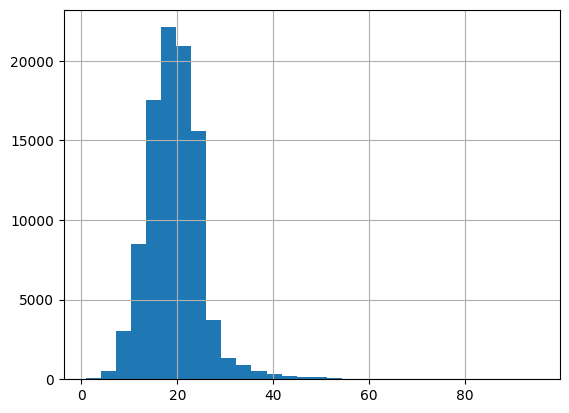

In [6]:
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 30)
max_seq_len = max(seq_len)
print(max_seq_len)

In [7]:
# tokenize and encode sequences in the training set
if max_seq_len>512:
    max_seq_len = 512
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

/home/user/conda/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [8]:
# for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())
print("train_y:",train_y)
# for validation set
val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())
print("val_y:",val_y)

train_y: tensor([4, 4, 4,  ..., 4, 1, 3])
val_y: tensor([1, 2, 2,  ..., 1, 1, 3])


In [9]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [10]:
train_data.tensors

(tensor([[  101,  3103, 12702,  ...,     0,     0,     0],
         [  101,  9706, 24890,  ...,     0,     0,     0],
         [  101, 18286,  4357,  ...,     0,     0,     0],
         ...,
         [  101,  1057,  2250,  ...,     0,     0,     0],
         [  101,  3481,  6063,  ...,     0,     0,     0],
         [  101, 26665,  1057,  ...,     0,     0,     0]]),
 tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]),
 tensor([4, 4, 4,  ..., 4, 1, 3]))

In [11]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

In [12]:
device = torch.device("cuda")
print(device)

cuda


In [13]:
class BERT_Arch(nn.Module):
    def __init__(self, bert,label_map):
        super(BERT_Arch, self).__init__()
        self.bert = bert 
      
        # dropout layer
        self.dropout = nn.Dropout(0.1)
        # relu activation function
        self.relu =  nn.ReLU()
        # dense layer 1
        self.fc1 = nn.Linear(768,512)
        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512,len(label_map))
        #softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)
        #define the forward pass
    def forward(self, sent_id, mask):
        #pass the inputs to the model 
        outputs = self.bert(sent_id, attention_mask=mask)
        cls_hs = outputs.last_hidden_state[:, 0, :]#outputs.pooler_output
        x = self.fc1(cls_hs)
        x = self.relu(x)
        x = self.dropout(x)
        # output layer
        x = self.fc2(x)
        # apply softmax activation
        x = self.softmax(x)
        return x

In [14]:
label_map = {'world': 1, 'sports': 2, 'business': 3, 'sci-fi': 4}
id2label = {1: 'world', 2: 'sports', 3: 'business', 4: 'sci-fi'}

In [15]:
# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert, label_map)

# push the model to GPU
model = model.to(device)

In [16]:
# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(), lr = 1e-3)

/home/user/conda/lib/python3.8/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [17]:
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_wts = compute_class_weight(class_weight='balanced', classes=np.unique(train_labels), y=train_labels)

print(class_wts)

[1. 1. 1. 1.]


In [18]:
# convert class weights to tensor
weights= torch.tensor(class_wts,dtype=torch.float)
weights = weights.to(device)

# loss function
cross_entropy  = nn.NLLLoss(weight=weights) 

# number of training epochs
epochs = 30

In [23]:
# function to train the model
def train():
    model.train()

    total_loss, total_accuracy = 0, 0
  
    # empty list to save model predictions
    total_preds=[]
    total_labels =[]
  
    # iterate over batches
    for step,batch in enumerate(train_dataloader):
        # print(batch)
        # progress update after every 50 batches.
        if step % 100 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

        # push the batch to gpu
        batch = [r.to(device) for r in batch]

        sent_id, mask, labels = batch
        # labels.apply_(lambda x: x-1)
        # clear previously calculated gradients 
        model.zero_grad()        

        # get model predictions for the current batch
        preds = model.forward(sent_id, mask)

        # compute the loss between actual and predicted values
        print(preds)
        print(labels)
        loss = cross_entropy(preds, labels)

        # add on to the total loss
        total_loss = total_loss + loss.item()

        # backward pass to calculate the gradients
        loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # update parameters
        optimizer.step()

        # model predictions are stored on GPU. So, push it to CPU
        preds = preds.detach().cpu().numpy()
        preds = np.argmax(preds, axis=1)
        # append the model predictions
        total_preds+=list(preds)
        total_labels+=labels.tolist()

    # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)

    # predictions are in the form of (no. of batches, size of batch, no. of classes).
    # reshape the predictions in form of (number of samples, no. of classes)
    #total_preds  = np.concatenate(total_preds, axis=0)
    f1 = f1_score(total_labels, total_preds, average='weighted')
    #returns the loss and predictions
    return avg_loss, f1

In [24]:
# function for evaluating the model
def evaluate():
  
    print("\nEvaluating...")

    # deactivate dropout layers
    model.eval()

    total_loss, total_accuracy = 0, 0

    # empty list to save the model predictions
    total_preds = []
    total_labels = []
    # iterate over batches
    for step,batch in enumerate(val_dataloader):
    
        # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:

          # Calculate elapsed time in minutes.
          #elapsed = format_time(time.time() - t0)

          # Report progress.
          print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

        # push the batch to gpu
        batch = [t.to(device) for t in batch]

        sent_id, mask, labels = batch

        # deactivate autograd
        with torch.no_grad():

            # model predictions
            preds = model(sent_id, mask)

            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds,labels)

            total_loss = total_loss + loss.item()

            preds = preds.detach().cpu().numpy()
            preds = np.argmax(preds, axis=1)
            total_preds+=list(preds)
            total_labels+=labels.tolist()
    # compute the validation loss of the epoch
    avg_loss = total_loss / len(val_dataloader) 

    # reshape the predictions in form of (number of samples, no. of classes)
    #total_preds  = np.concatenate(total_preds, axis=0)
    
    f1 = f1_score(total_labels, total_preds, average='weighted')
    return avg_loss, f1

In [25]:
def save_checkpoint(filename, epoch, model, optimizer, label_map, id2label):
    state = {
        'epoch': epoch,
        'model': model,
        'optimizer': optimizer,
        'label_map': label_map,
        'id_map':id2label}
    torch.save(state, filename)

In [26]:

# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, f1_train = train()
    
    #evaluate model
    valid_loss, f1_valid = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        file_name = 'topic_saved_weights.pt'
        save_checkpoint(file_name, epoch, model, optimizer, label_map, id2label)
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')
    print(f'\nTraining F1: {f1_train:.3f}')
    print(f'Validation F1: {f1_valid:.3f}')


 Epoch 1 / 30


RuntimeError: CUDA error: device-side assert triggered